In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100) 
%matplotlib inline

In [2]:
df_full=pd.read_csv("compas-scores-raw.csv")
print("Shape: {0}".format(df_full.shape))
df_full.head(3)
#The data itself has (60,000 rows and 28 columns) 

Shape: (60843, 28)


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0


In [3]:
df_full["DisplayText"].value_counts()

Risk of Violence             20281
Risk of Failure to Appear    20281
Risk of Recidivism           20281
Name: DisplayText, dtype: int64

In [4]:
#separating the df into the 3 measures of risk
df_violence = df_full.loc[df_full["DisplayText"] == "Risk of Violence"]
df_violence

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,7,Risk of Violence,-1.20,8,High,New,1,0
9,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,7,Risk of Violence,-1.29,7,Medium,New,1,0
12,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.90,2,Low,New,1,0
15,50852,57179,51961,PRETRIAL,Holland,Terrance,NaN,Male,Hispanic,01/11/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,3,Medium with Override Consideration,7,Risk of Violence,-1.33,7,Medium,New,1,0
18,50840,57163,51946,PRETRIAL,Colon,Susana,NaN,Female,Caucasian,10/17/66,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-3.01,1,Low,New,1,0
21,50853,57178,51960,PRETRIAL,Brown,Devaughn,NaN,Male,African-American,07/25/93,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,3,Medium with Override Consideration,7,Risk of Violence,-1.44,7,Medium,New,1,0
24,50847,57170,51953,PRETRIAL,Walters,Patwayne,B,Male,Other,10/24/72,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-3.03,1,Low,New,1,0
27,50842,57165,51948,PRETRIAL,Mulligan,William,Joseph,Male,Caucasian,10/25/86,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.69,2,Low,New,1,0


### Which columns are useful

In [5]:
df_violence.shape

(20281, 28)

In [6]:
df_violence.nunique(axis=0, dropna=True)

Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       1
DisplayText                    1
RawScore                     485
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64

In [7]:
#person, assessment, case, last/first/middle are all individual
#columns w/ only one value aren't useful
df_violence = df_violence.drop(["Person_ID", "AssessmentID", "Case_ID", "LastName", "FirstName", "MiddleName", "AssessmentReason", "Scale_ID", "DisplayText", "IsCompleted", "IsDeleted"], axis=1)

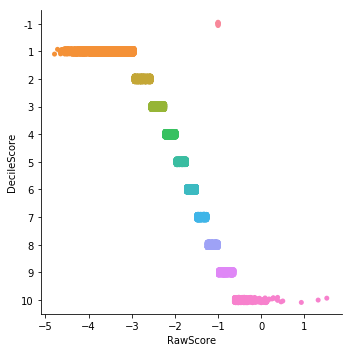

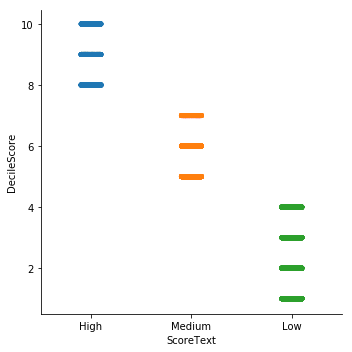

In [8]:
#how many of these are results?
#Correlation between Rawscore and DecileScore - Looks like it is a calculated field. They are definitely correlated.
sns.catplot(x="RawScore", y="DecileScore", data=df_violence, orient="h")

#Correlation between ScoreText and DecileScore - 
#Looks like there are also calculated field. They are definitely correlated.
sns.catplot(x="ScoreText", y="DecileScore", data=df_violence, orient="v", order=["High", "Medium", "Low"])

In [9]:
#split the 3 scoreText categories into 2 scoreText categories; 1-5, 6-10
#df_index is violence = 0, recidivism = 1, failure to appear = 2 to account for the shift in index
def binary(df, df_index):
    decileScores = []
    for x in range(0, len(df["DecileScore"])):
        if df["DecileScore"][3*x+df_index] >= 1 and df["DecileScore"][3*x+df_index] <= 5:
            decileScores.append("Low")
        elif df["DecileScore"][3*x+df_index] >= 6 and df["DecileScore"][3*x+df_index] <= 10:
            decileScores.append("High")
        else:
            decileScores.append("NA")
    df["binaryScore"] = decileScores

In [10]:
binary(df_violence, 0)

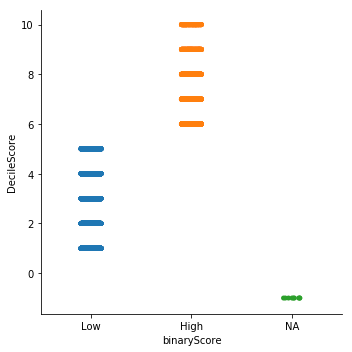

In [11]:
sns.catplot(x="binaryScore", y="DecileScore", data=df_violence, orient="v", order=["Low", "High", "NA"])

In [12]:
def findSlash(sdate):
    slashes = []
    for x in range(0, len(sdate)):
        if sdate[x] == "/" or sdate[x] == " ":
            slashes.append(x)
    return slashes

In [13]:
#create "age" category from dateofbirth
def age(dob, sdate):
    #True = 1, False = 0
    byear = int(dob[6:])
    bmonth = int(dob[3:5])
    bday = int(dob[:2])
    
    slashes = findSlash(sdate)
    syear = int(sdate[slashes[1]+1:slashes[2]])
    smonth = int(sdate[slashes[0]+1:slashes[1]])
    sday = int(sdate[:slashes[0]])
    
    year_4_digits = syear - byear - ((smonth, sday) < (bmonth, bday))
    return year_4_digits % 100

In [14]:
#indices for violence are every third
ages = []
for x in range(0, len(df_violence["DateOfBirth"])):
    ages.append(age(df_violence["DateOfBirth"][3*x], df_violence["Screening_Date"][3*x]))

In [15]:
df_violence["Age"] = ages
df_violence = df_violence.drop(["DateOfBirth", "Screening_Date"], axis=1)
df_violence.nunique(axis=0, dropna=True)

Agency_Text                  4
Sex_Code_Text                2
Ethnic_Code_Text             9
ScaleSet_ID                  2
ScaleSet                     2
Language                     2
LegalStatus                  7
CustodyStatus                6
MaritalStatus                7
RecSupervisionLevel          4
RecSupervisionLevelText      4
RawScore                   485
DecileScore                 11
ScoreText                    3
AssessmentType               2
binaryScore                  3
Age                         69
dtype: int64

In [16]:
df_violence["ScoreText"].unique() #there are some null values here

array(['Low', 'High', 'Medium', nan], dtype=object)

In [17]:
#checking the full df without dropped RawScores to see what ScoreText = null means
df_full.loc[pd.isna(df_full["ScoreText"]), "RawScore"].value_counts()
#a raw score of -1, which won't matter overall

-1.0    45
Name: RawScore, dtype: int64

In [18]:
#drop the Null ScoreText values
df_violence = df_violence.drop(df_violence[pd.isna(df_violence["ScoreText"])].index, axis=0)

In [19]:
#I can probably just keep binaryScore and predict 2 broad categories of score 
df_violence = df_violence.drop(["RawScore", "DecileScore", "ScoreText"], axis=1)
df_violence.nunique(axis=0, dropna=True)

Agency_Text                 4
Sex_Code_Text               2
Ethnic_Code_Text            9
ScaleSet_ID                 2
ScaleSet                    2
Language                    2
LegalStatus                 7
CustodyStatus               6
MaritalStatus               7
RecSupervisionLevel         4
RecSupervisionLevelText     4
AssessmentType              2
binaryScore                 2
Age                        69
dtype: int64

In [20]:
#ScaleSet is the type of dataset they're measuring against - it doesn't determine the outcome
#Same thing w AssessmentType
df_violence["ScaleSet"].value_counts()
df_violence["AssessmentType"].value_counts()
df_violence = df_violence.drop(["ScaleSet", "ScaleSet_ID", "AssessmentType"], axis=1)

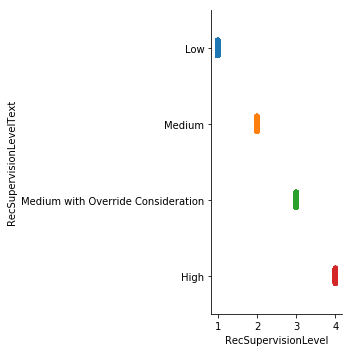

In [21]:
df_violence["RecSupervisionLevelText"].value_counts()

#RecSupervisionLevel directly correlates to RecSupervisionLevelText
sns.catplot(x="RecSupervisionLevel", y="RecSupervisionLevelText", data=df_violence, orient="h", order=["Low", "Medium", "Medium with Override Consideration", "High"])


In [22]:
#I can just keep the text values for  RecSupervisionLevel
df_violence = df_violence.drop("RecSupervisionLevel", axis=1)
df_violence.nunique(axis=0, dropna=True)

Agency_Text                 4
Sex_Code_Text               2
Ethnic_Code_Text            9
Language                    2
LegalStatus                 7
CustodyStatus               6
MaritalStatus               7
RecSupervisionLevelText     4
binaryScore                 2
Age                        69
dtype: int64

In [23]:
#factorize all non-numerical columns - i.e. everything but age
for x in range (0, 9): #indices in column list before ScoreText
    df_violence[df_violence.columns[x]] = pd.factorize(df_violence[df_violence.columns[x]])[0]

In [24]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

len(df_violence)

20272

In [27]:
#the split is ~12.5:2.5:5 i.e. .75 is training/validation; .1667 of that is validation
df_violence["train"] = np.random.uniform(0, 1, len(df_violence)) <= .75
nonTest = df_violence[df_violence["train"]]
test = df_violence[df_violence["train"] == False]
nonTest["validate"] = np.random.uniform(0, 1, len(nonTest)) <= .17
training = nonTest[nonTest["validate"] == False]
validation = nonTest[nonTest["validate"]]
training.shape

/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(12674, 12)

In [28]:
training.columns #we want everything except the end result and train/validate markers

Index(['Agency_Text', 'Sex_Code_Text', 'Ethnic_Code_Text', 'Language',
       'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'RecSupervisionLevelText', 'binaryScore', 'Age', 'train', 'validate'],
      dtype='object')

In [29]:
features = training.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 9]]

In [30]:
clf = RandomForestClassifier(random_state = 0, n_estimators = 10000) #random_state is the seed

In [31]:
risk = training["binaryScore"].values

In [32]:
clf.fit(features, risk)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(validation.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9]])
actuals = validation["binaryScore"].values

In [34]:
print(classification_report(actuals, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2077
           1       0.81      0.75      0.78       558

   micro avg       0.91      0.91      0.91      2635
   macro avg       0.87      0.85      0.86      2635
weighted avg       0.91      0.91      0.91      2635



In [35]:
#save violence model
clf_violence = clf

In [35]:
imp = clf.feature_importances_
feat = features.columns
d = {"feat": feat, "imp": imp}
importances = pd.DataFrame(d)

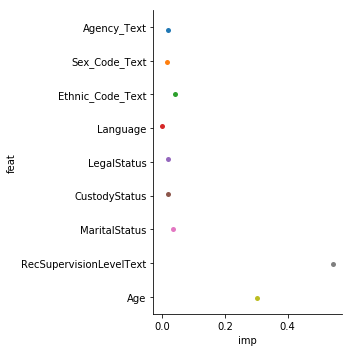

In [36]:
sns.catplot(x="imp", y="feat", data=importances, orient="h")

In [53]:
#cross reference df_full values with validation factorized values for 3, 6, 162
#0 = caucasian, 1 = african-american, 2 = hispanic
[df_full.loc[3, "Ethnic_Code_Text"], df_full.loc[6, "Ethnic_Code_Text"], df_full.loc[162, "Ethnic_Code_Text"]]

['Caucasian', 'African-American', 'Hispanic']

In [41]:
validation["prediction"] = predictions
validation["actual"] = actuals
validation["bias"] = validation["actual"] < validation["prediction"]

/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [42]:
worseTotal = validation.loc[validation["bias"]]
def biasRatio(ethnic_code):
    worsePerRace = len(worseTotal.loc[worseTotal["Ethnic_Code_Text"] == ethnic_code])
    totalPerRace = len(validation.loc[validation["Ethnic_Code_Text"] == ethnic_code])
    return [totalPerRace/len(validation), worsePerRace/len(worseTotal)]

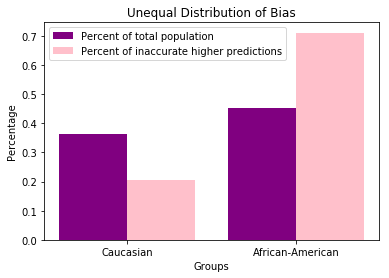

In [43]:
#caucasian, african-american - statistical significance is a .2 difference generally
X = ['Caucasian','African-American']
totalPercent = [biasRatio(0)[0], biasRatio(1)[0]]
biasPercent = [biasRatio(0)[1], biasRatio(1)[1]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, totalPercent, 0.4, color='purple', label = 'Percent of total population') 
plt.bar(X_axis + 0.2, biasPercent, 0.4, color='pink', label = 'Percent of inaccurate higher predictions')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Percentage")
plt.title("Unequal Distribution of Bias")
plt.legend()
plt.show()

In [44]:
[biasRatio(0), biasRatio(1)]

[[0.36391673091750193, 0.20618556701030927],
 [0.4510408635312259, 0.711340206185567]]

In [45]:
def results(target): #for 0, 1, or 2
    results = []
    for x in range(0, len(validation)):
        if predictions[x] == actuals[x] and actuals[x] == target:
            results.append("true positive")
        else:
            if predictions[x] != actuals[x]:
                if predictions[x] == target:
                    results.append("false positive")
                elif actuals[x] == target:
                    results.append("false negative")
                else:
                    results.append("true negative")
            else:
                results.append("true negative")
    return results

In [46]:
def parities(target, ethnic_code, parity): #target to call results
    validation["results"] = results(target)
    falsePositives = validation.loc[validation["results"] == "false positive"]
    truePositives = validation.loc[validation["results"] == "true positive"]
    trueNegatives = validation.loc[validation["results"] == "true negative"]
    
    positives = pd.concat([falsePositives, truePositives])    
    
    total = len(validation[validation["Ethnic_Code_Text"] == ethnic_code])
    
    if parity == "proportional":
        withinParity = len(positives[positives["Ethnic_Code_Text"] == ethnic_code])
        return withinParity/total #proportion of people who are low, high out of total # in ethnicity
    elif parity == "specificity":
        withinParity = len(trueNegatives[trueNegatives["Ethnic_Code_Text"] == ethnic_code])
        return withinParity/total #proportion of people who are low, high out of total # in ethnicity
    else: 
        #precision = true positives/all positives
        return len(positives[positives["Ethnic_Code_Text"] == ethnic_code])/len(truePositives[truePositives["Ethnic_Code_Text"] == ethnic_code])
        

In [51]:
def graphParities(parity):
    X = ['Low Risk','High Risk']
    X_axis = np.arange(len(X))
    if parity == "proportional":
        black = [parities(0, 1, "proportional"), parities(1, 1, "proportional")]
        white = [parities(0, 0, "proportional"), parities(1, 0, "proportional")]

        plt.title("Proportional Parity")
    elif parity == "specificity":
        black = [parities(0, 1, "specificity"), parities(1, 1, "specificity")]
        white = [parities(0, 0, "specificity"), parities(1, 0, "specificity")]

        plt.title("Specificity Parity")
    else:
        black = [parities(0, 1, "predictive"), parities(1, 1, "predictive")]
        white = [parities(0, 0, "predictive"), parities(1, 0, "predictive")]

        plt.title("Predictive Parity")

    plt.bar(X_axis - 0.2, white, 0.4, color='green', label = 'Caucasian') 
    plt.bar(X_axis + 0.2, black, 0.4, color='blue', label = 'African-American')

    plt.xticks(X_axis, X)
    plt.xlabel("Risk Levels")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


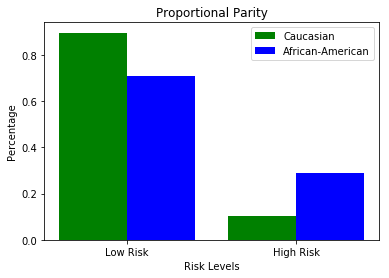

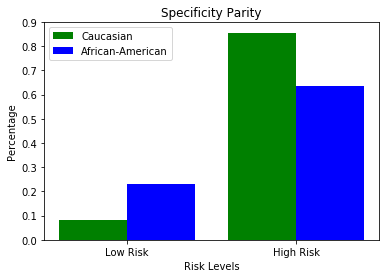

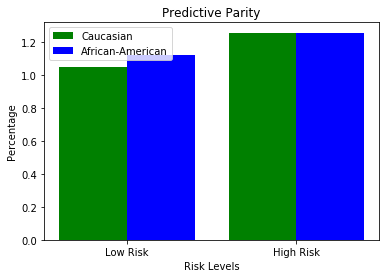

In [52]:
graphParities("proportional") #much more willing to predict high risk for black people
graphParities("specificity") #more willing to be true negative for white people at high risk
graphParities("predictive")

In [37]:
df_recidivism = df_full.loc[df_full["DisplayText"] == "Risk of Recidivism"]

In [35]:
#need findSlash, age, binary, and all the imports defined
def processing(df, df_index):
    df = df.drop(["Person_ID", "AssessmentID", "Case_ID", "LastName", "FirstName", "MiddleName", "AssessmentReason", "Scale_ID", "DisplayText", "IsCompleted", "IsDeleted"], axis=1)
    df = df.drop(["ScaleSet", "ScaleSet_ID", "AssessmentType"], axis=1)
    df = df.drop("RecSupervisionLevel", axis=1)
    binary(df, df_index)
    #have to calculate ages before dropping na scoreText values bc it causes missing indices
    ages = []
    for x in range(0, len(df["DateOfBirth"])):
        ages.append(age(df["DateOfBirth"][3*x+df_index], df["Screening_Date"][3*x+df_index]))
    df["Age"] = ages
    df = df.drop(["DateOfBirth", "Screening_Date"], axis=1)
    df = df.drop(df[pd.isna(df["ScoreText"])].index, axis=0)
    df = df.drop(["RawScore", "DecileScore", "ScoreText"], axis=1)
    for x in range (0, 9):
        df[df.columns[x]] = pd.factorize(df[df.columns[x]])[0]
    df["train"] = np.random.uniform(0, 1, len(df)) <= .75
    training = df[df["train"]]
    test = df[df["train"] == False]
    '''nonTest["validate"] = np.random.uniform(0, 1, len(nonTest)) <= .17
    training = nonTest[nonTest["validate"] == False]
    validation = nonTest[nonTest["validate"]]'''
    features = training.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 9]]
    clf = RandomForestClassifier(random_state = 0, n_estimators = 10000)
    risk = training["binaryScore"].values
    clf.fit(features, risk)
    predictions = clf.predict(test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9]])
    actuals = test["binaryScore"].values
    print(classification_report(actuals, predictions))
    

In [39]:
processing(df_recidivism, 1)

/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1695
           1       0.96      0.98      0.97       936

   micro avg       0.98      0.98      0.98      2631
   macro avg       0.97      0.98      0.97      2631
weighted avg       0.98      0.98      0.98      2631



In [54]:
df_failure = df_full.loc[df_full["DisplayText"] == "Risk of Failure to Appear"]

In [56]:
processing(df_failure, 2)

/Users/vaidyanathasiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2105
           1       0.58      0.40      0.47       469

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.73      0.67      0.69      2574
weighted avg       0.82      0.84      0.82      2574

